In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import xarray as xr
import pandas as pd
#from wcmatch.pathlib import Path # Handling of path object
from glob import glob
from plotnine import *
from matplotlib import pyplot as plt
import os
from netCDF4 import Dataset as netcdf_dataset
import math as m
from wcmatch.pathlib import Path # Handling of path object

## load PSSdb dataset, only for UVP and Scanners

In [2]:
PSSdb_1b_files = glob('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/*1b*.csv')
PSSdb_1b_files = [x for x in PSSdb_1b_files if 'IFCB' not in x]

PSSdb_1a_files = glob('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/*1a*.csv')
PSSdb_1a_files = [x for x in PSSdb_1a_files if 'IFCB' not in x]

In [3]:
PSSdb_1a_files

['/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/UVP_1a_Size-distribution_v2024-04.csv',
 '/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/Scanner_1a_Size-distribution_v2024-04.csv']

In [4]:
df=pd.concat(map((lambda path: (pd.read_csv(path))), PSSdb_1b_files)).reset_index(drop=True)
df_1a=pd.concat(map((lambda path: (pd.read_csv(path))), PSSdb_1a_files)).reset_index(drop=True)

## integrate intercept and biovolume values, so they match units from model data (from Liters to m^2)

In [5]:
#get rid of log scale, convert liters to cubic meters, integrate by depth, and transform back to log
df['intercept_m2'] = np.log10(((10**df.NBSS_intercept_mean)/0.001)*df.max_depth)#df.max_depth


In [6]:
df_1a

,year,month,latitude,longitude,ocean,min_depth,max_depth,n,biovolume_size_class,normalized_biovolume_mean,normalized_biovolume_std,equivalent_circular_diameter_mean,normalized_abundance_mean,normalized_abundance_std,QC_3std_dev,QC_min_n_size_bins,QC_R2,Unnamed: 17
0,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,5.271000e+07,6.325000,NaN,459.2,0.751700,NaN,0,0,0,NaN
1,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,1.054000e+08,4.984000,NaN,578.5,0.591800,NaN,0,0,0,NaN
2,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,2.108000e+08,3.178000,NaN,728.9,0.334100,NaN,0,0,0,NaN
3,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,4.217000e+08,1.729000,NaN,918.4,0.162900,NaN,0,0,0,NaN
4,2008,7,22.5,-157.5,North Pacific Ocean,1.0,201.0,1,8.433000e+08,0.225600,NaN,1157.0,0.025200,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21764,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,6.747000e+09,0.003647,NaN,2314.0,0.000266,NaN,0,0,0,NaN
21765,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,1.349000e+10,0.001079,NaN,2916.0,0.000072,NaN,0,0,0,NaN
21766,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,2.699000e+10,0.000437,NaN,3673.0,0.000026,NaN,0,0,0,NaN
21767,2022,5,0.5,-43.5,North Atlantic Ocean,0.0,200.0,1,5.397000e+10,0.000297,NaN,4628.0,0.000017,NaN,0,0,0,NaN


In [7]:
df

,year,month,latitude,longitude,ocean,min_depth,max_depth,n,NBSS_slope_mean,NBSS_intercept_mean,...,PSD_intercept_mean,PSD_r2_mean,PSD_slope_std,PSD_intercept_std,PSD_r2_std,QC_3std_dev,QC_min_n_size_bins,QC_R2,Unnamed: 23,intercept_m2
0,1996,5,43.5,7.5,Mediterranean Region,0.0,60.0,1,-2.127,16.670,...,17.010,0.8020,NaN,NaN,NaN,1,0,1,NaN,21.448151
1,1996,8,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.395,10.060,...,9.812,0.9469,NaN,NaN,NaN,0,0,0,NaN,14.838151
2,1996,9,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.204,8.608,...,8.630,0.9152,NaN,NaN,NaN,0,1,0,NaN,13.386151
3,1996,12,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.161,7.770,...,7.592,0.9656,NaN,NaN,NaN,0,0,0,NaN,12.548151
4,1997,1,43.5,7.5,Mediterranean Region,0.0,60.0,2,-1.154,8.286,...,8.185,0.9495,0.3851,1.5510,0.03598,0,0,0,NaN,13.064151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,2,43.5,7.5,Mediterranean Region,17.0,201.0,10,-1.596,12.590,...,12.870,0.9469,0.5811,1.5430,0.04545,0,0,0,NaN,17.893196
1802,2021,5,48.5,-14.5,North Atlantic Ocean,2.0,201.0,4,-1.094,9.651,...,9.882,0.9599,0.0951,0.2454,0.02386,0,0,0,NaN,14.954196
1803,2021,5,48.5,-15.5,North Atlantic Ocean,4.0,201.0,4,-1.110,9.793,...,10.060,0.9659,0.3586,1.0340,0.01287,0,0,0,NaN,15.096196
1804,2021,5,49.5,-14.5,North Atlantic Ocean,2.0,201.0,8,-1.073,9.430,...,9.628,0.9645,0.1954,0.5182,0.01372,0,0,0,NaN,14.733196


In [8]:
np.min(df_1a.biovolume_size_class)

823500.0

In [9]:
print((((np.min(df_1a.biovolume_size_class)*6)/m.pi)**(1./3.)))

116.29338013672985


In [10]:
np.max(df_1a.biovolume_size_class)

27630000000000.0

In [11]:
print((((np.max(df_1a.biovolume_size_class)*6)/m.pi)**(1./3.)))

37508.303448748884


In [12]:
df

,year,month,latitude,longitude,ocean,min_depth,max_depth,n,NBSS_slope_mean,NBSS_intercept_mean,...,PSD_intercept_mean,PSD_r2_mean,PSD_slope_std,PSD_intercept_std,PSD_r2_std,QC_3std_dev,QC_min_n_size_bins,QC_R2,Unnamed: 23,intercept_m2
0,1996,5,43.5,7.5,Mediterranean Region,0.0,60.0,1,-2.127,16.670,...,17.010,0.8020,NaN,NaN,NaN,1,0,1,NaN,21.448151
1,1996,8,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.395,10.060,...,9.812,0.9469,NaN,NaN,NaN,0,0,0,NaN,14.838151
2,1996,9,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.204,8.608,...,8.630,0.9152,NaN,NaN,NaN,0,1,0,NaN,13.386151
3,1996,12,43.5,7.5,Mediterranean Region,0.0,60.0,1,-1.161,7.770,...,7.592,0.9656,NaN,NaN,NaN,0,0,0,NaN,12.548151
4,1997,1,43.5,7.5,Mediterranean Region,0.0,60.0,2,-1.154,8.286,...,8.185,0.9495,0.3851,1.5510,0.03598,0,0,0,NaN,13.064151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,2,43.5,7.5,Mediterranean Region,17.0,201.0,10,-1.596,12.590,...,12.870,0.9469,0.5811,1.5430,0.04545,0,0,0,NaN,17.893196
1802,2021,5,48.5,-14.5,North Atlantic Ocean,2.0,201.0,4,-1.094,9.651,...,9.882,0.9599,0.0951,0.2454,0.02386,0,0,0,NaN,14.954196
1803,2021,5,48.5,-15.5,North Atlantic Ocean,4.0,201.0,4,-1.110,9.793,...,10.060,0.9659,0.3586,1.0340,0.01287,0,0,0,NaN,15.096196
1804,2021,5,49.5,-14.5,North Atlantic Ocean,2.0,201.0,8,-1.073,9.430,...,9.628,0.9645,0.1954,0.5182,0.01372,0,0,0,NaN,14.733196


## modify variables to match format from OBGCMs

In [13]:
df['month']= df['month'].astype(str).str.zfill(2)
df['year']= df['year'].astype(str)
df['time'] = df.year+df.month
df['time']= pd.to_datetime(df['time'], format = '%Y%m')
df.rename(columns={'latitude':'lat', 'longitude':'lon'}, inplace=True)

In [14]:
len(df)

1806

In [15]:
np.mean(df.NBSS_slope_mean)

-1.0721057032115173

In [16]:
np.min(df.NBSS_slope_mean)

-2.209

In [17]:
np.max(df.NBSS_slope_mean)

0.0591

In [18]:
10**(np.mean(df.intercept_m2))

38816490623032.414

In [19]:
10**(np.min(df.intercept_m2))

14.658976551654266

In [20]:
10**(np.max(df.intercept_m2))

1.489630114568738e+25

In [21]:
np.mean(df.NBSS_r2_mean)

0.9545465116279069

In [22]:
np.min(df.NBSS_r2_mean)

0.4467

In [23]:
np.max(df.NBSS_r2_mean)

0.9977

In [24]:
pssdb_mean=df.astype(dict(zip(['lat','lon'],[str]*2))).groupby(['lat', 'lon', 'time']).apply(lambda x: pd.Series({'betas_hist':np.nanmean(x.NBSS_slope_mean), 'intercept_hist':np.nanmean(x.intercept_m2),'R2_hist':np.nanmean(x.NBSS_r2_mean)})).reset_index().rename(columns={"latitude": "lat", "longitude": "lon"})
pssdb_mean = pssdb_mean.astype(dict(zip(['lat','lon'],[float]*2)))
len(pssdb_mean)

1630

In [25]:
pssdb_mean

,lat,lon,time,betas_hist,intercept_hist,R2_hist
0,-0.5,-0.5,2019-09-01,-1.2200,14.840196,0.9821
1,-0.5,-150.5,2015-04-01,-1.1560,14.472196,0.9667
2,-0.5,-151.5,2015-04-01,-1.1430,14.409196,0.9751
3,-0.5,-153.5,2011-09-01,-1.4020,16.873196,0.9836
4,-0.5,-17.5,2019-10-01,-1.3600,15.863196,0.9818
...,...,...,...,...,...,...
1625,9.5,-25.5,2014-04-01,-0.8705,12.225196,0.9876
1626,9.5,-28.5,2015-05-01,-1.0190,13.745196,0.9512
1627,9.5,-35.5,2015-05-01,-1.0870,13.954196,0.9851
1628,9.5,-40.5,2015-05-01,-1.0980,14.019196,0.9701


## Use integration to get total biomass from linear regression

In [26]:
#import sympy as sy
#def integrate(NBSS_slope_mean, NBSS_intercept_mean, min_size, max_size):
    #def f(x): 
        #return (10**(NBSS_intercept_mean))*(x**NBSS_slope_mean)  
  
    #x = sy.Symbol("x") 
    #print(sy.integrate(f(x), (x, min_size, max_size)))
    #return (sy.integrate(f(x), (x, min_size, max_size)))

In [27]:
#test = integrate(-1.157, 8.310, 2, 35000)

In [28]:
#df['total_biovolume'] = df.apply(lambda x: integrate(x.NBSS_slope_mean, x.NBSS_intercept_mean, np.min(df_1a.biovolume_size_class), np.max(df_1a.biovolume_size_class)), axis=1) # integrating from the min and max size class in PSSdb from UVP and Zooscan

## alternative (and perhaps more appropiate) use all variables from PSSdb to summ the biovolumes for the UVP and Zooscan range

In [29]:
PSSdb_full_files = glob('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/*all_var*.csv')
PSSdb_full_files = [x for x in PSSdb_full_files if 'IFCB' not in x]
df_full=pd.concat(map((lambda path: (pd.read_csv(path))), PSSdb_full_files)).reset_index(drop=True)
#convert liters to cubic meters, integrate biovolume by depth
df_full['biovolume_m2'] = (df_full.Biovolume_mean/0.001)*df_full.Max_obs_depth#df.max_depth

df_full=df_full.astype(dict(zip(['midLatBin','midLonBin'],[str]*2))).groupby(['midLatBin', 'midLonBin', 'date_bin']).apply(lambda x: pd.Series({'total_biovolume':np.sum(x.biovolume_m2)})).reset_index()
df_full = df_full.astype(dict(zip(['midLatBin','midLonBin'],[float]*2)))

df_full.head()

,midLatBin,midLonBin,date_bin,total_biovolume
0,-0.25,-0.25,2019_09_wk39,9.228018e+15
1,-0.25,-150.75,2015_04_wk16,1.034154e+16
2,-0.25,-151.25,2015_04_wk16,1.018038e+16
3,-0.25,-153.75,2011_09_wk36,1.064265e+16
4,-0.25,-17.25,2019_10_wk40,2.495337e+15


In [30]:
lat_increments = np.arange(np.floor(min(df_full.midLatBin) - 1),
                               np.ceil(max(df_full.midLatBin) + 1), 1)
df_full['midLatBin'] = pd.cut(x=df_full['midLatBin'], bins=lat_increments, include_lowest=True)
df_full['midLatBin'] = df_full['midLatBin'].apply(lambda x:x.mid).astype(float)



lon_increments = np.arange(np.floor(min(df_full.midLonBin) - 1),
                               np.ceil(max(df_full.midLonBin) + 1), 1)
df_full['midLonBin'] = pd.cut(x=df_full['midLonBin'], bins=lon_increments, include_lowest=True)
df_full['midLonBin'] = df_full['midLonBin'].apply(lambda x:x.mid).astype(float)


df_full['year'] = df_full['date_bin'].apply(lambda x:x.split('_')[0])
df_full['month'] = df_full['date_bin'].apply(lambda x:x.split('_')[1])
df_full['time'] = df_full.year+df_full.month
df_full['time']= pd.to_datetime(df_full['time'], format = '%Y%m')
df_full.rename(columns={'midLatBin':'lat', 'midLonBin':'lon'}, inplace=True)
df_full.head()

,lat,lon,date_bin,total_biovolume,year,month,time
0,-0.5,-0.5,2019_09_wk39,9.228018e+15,2019,09,2019-09-01
1,-0.5,-150.5,2015_04_wk16,1.034154e+16,2015,04,2015-04-01
2,-0.5,-151.5,2015_04_wk16,1.018038e+16,2015,04,2015-04-01
3,-0.5,-153.5,2011_09_wk36,1.064265e+16,2011,09,2011-09-01
4,-0.5,-17.5,2019_10_wk40,2.495337e+15,2019,10,2019-10-01


In [31]:
df_full=df_full.astype(dict(zip(['lat','lon'],[str]*2))).groupby(['lat', 'lon', 'time']).apply(lambda x: pd.Series({'total_biovolume':np.mean(x.total_biovolume)})).reset_index()
df_full = df_full.astype(dict(zip(['lat','lon'],[float]*2)))
len(df_full)

1630

In [32]:
np.min(df_full.total_biovolume)

20359701797560.02

In [33]:
np.max(df_full.total_biovolume)

1.0155444259234976e+19

In [34]:
np.min(df_full['total_biovolume'])

20359701797560.02

## merge biovolume data with 1b products

In [35]:
pssdb_mean = pd.merge(pssdb_mean, df_full, on=['lat','lon', 'time'])
pssdb_mean

,lat,lon,time,betas_hist,intercept_hist,R2_hist,total_biovolume
0,-0.5,-0.5,2019-09-01,-1.2200,14.840196,0.9821,9.228018e+15
1,-0.5,-150.5,2015-04-01,-1.1560,14.472196,0.9667,3.222041e+16
2,-0.5,-151.5,2015-04-01,-1.1430,14.409196,0.9751,1.541309e+16
3,-0.5,-153.5,2011-09-01,-1.4020,16.873196,0.9836,6.590981e+15
4,-0.5,-17.5,2019-10-01,-1.3600,15.863196,0.9818,2.434160e+15
...,...,...,...,...,...,...,...
1625,9.5,-25.5,2014-04-01,-0.8705,12.225196,0.9876,1.009297e+16
1626,9.5,-28.5,2015-05-01,-1.0190,13.745196,0.9512,1.016288e+16
1627,9.5,-35.5,2015-05-01,-1.0870,13.954196,0.9851,5.172112e+15
1628,9.5,-40.5,2015-05-01,-1.0980,14.019196,0.9701,6.471689e+15


## convert PSSdb to xarray so that we can make the conversion of times to seasons

In [36]:
ds_pssdb = pssdb_mean.set_index(['lat', 'lon', 'time']).to_xarray()
ds_pssdb = ds_pssdb.groupby('time.month').mean(dim='time')


In [37]:
ds_pssdb

<xarray.Dataset>
Dimensions:          (lat: 126, lon: 251, month: 12)
Coordinates:
  * lat              (lat) float64 -64.5 -63.5 -62.5 -60.5 ... 78.5 79.5 80.5
  * lon              (lon) float64 -179.5 -178.5 -177.5 ... 175.5 176.5 178.5
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    betas_hist       (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    intercept_hist   (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    R2_hist          (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    total_biovolume  (month, lat, lon) float64 nan nan nan nan ... nan nan nan

In [38]:
for var in [ 'betas_hist', 'intercept_hist', 'R2_hist', 'total_biovolume']: # biomass arrays here 
    SH_subset = ds_pssdb[var].where(ds_pssdb.lat < 0,drop=True).values # selecting southern hemisphere
    SH_subset = np.roll(SH_subset, shift=6, axis=0) #shift the season occurence by six months (only southern hemispher)
    full_field = ds_pssdb[var].values #select biomass values for each of the phytoplankton groups
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset # from full_field biomass subset, select all months (1st dim), 
    #latitudes from 0 to the lenght of southen hemisphere subset (dim2) and all longitudes
    svar = var #+ '_shift' # 
    ds_pssdb[svar] = xr.DataArray(full_field, dims=ds_pssdb[var].dims, coords=ds_pssdb[var].coords)

In [39]:
ds_pssdb

<xarray.Dataset>
Dimensions:          (lat: 126, lon: 251, month: 12)
Coordinates:
  * lat              (lat) float64 -64.5 -63.5 -62.5 -60.5 ... 78.5 79.5 80.5
  * lon              (lon) float64 -179.5 -178.5 -177.5 ... 175.5 176.5 178.5
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    betas_hist       (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    intercept_hist   (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    R2_hist          (month, lat, lon) float64 nan nan nan nan ... nan nan nan
    total_biovolume  (month, lat, lon) float64 nan nan nan nan ... nan nan nan

## merge PSSdb and biome datasets

In [40]:
pssdb_mean = ds_pssdb.to_dataframe().reset_index()
pssdb_mean

,lat,lon,month,betas_hist,intercept_hist,R2_hist,total_biovolume
0,-64.5,-179.5,1,NaN,NaN,NaN,NaN
1,-64.5,-179.5,2,NaN,NaN,NaN,NaN
2,-64.5,-179.5,3,NaN,NaN,NaN,NaN
3,-64.5,-179.5,4,NaN,NaN,NaN,NaN
4,-64.5,-179.5,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
379507,80.5,178.5,8,NaN,NaN,NaN,NaN
379508,80.5,178.5,9,NaN,NaN,NaN,NaN
379509,80.5,178.5,10,NaN,NaN,NaN,NaN
379510,80.5,178.5,11,NaN,NaN,NaN,NaN


In [41]:
pssdb_mean=pssdb_mean.set_index(['lat', 'lon'])
pssdb_mean

month  betas_hist  intercept_hist  R2_hist  total_biovolume
lat   lon                                                                
-64.5 -179.5      1         NaN             NaN      NaN              NaN
      -179.5      2         NaN             NaN      NaN              NaN
      -179.5      3         NaN             NaN      NaN              NaN
      -179.5      4         NaN             NaN      NaN              NaN
      -179.5      5         NaN             NaN      NaN              NaN
...             ...         ...             ...      ...              ...
 80.5  178.5      8         NaN             NaN      NaN              NaN
       178.5      9         NaN             NaN      NaN              NaN
       178.5     10         NaN             NaN      NaN              NaN
       178.5     11         NaN             NaN      NaN              NaN
       178.5     12         NaN             NaN      NaN              NaN

[379512 rows x 5 columns]

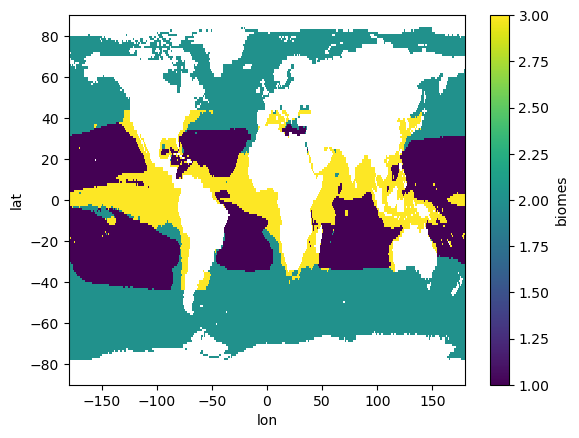

In [42]:
biomes_obs= xr.open_mfdataset('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/data_biomes_x1.nc')
biomes_mask = ~np.isnan(biomes_obs.biomes)
biomes_obs['biomes'] = biomes_obs['biomes'].where((biomes_obs['lat'] < 44.5) & (biomes_obs['lat'] > -44.5), 2)
biomes_obs = biomes_obs.where(biomes_mask)
biomes_obs.biomes.plot()

In [43]:
biomes_obs

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    biomes   (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [44]:
#biomes_obs['betas_obs'] = (('month', 'lat', 'lon'), ds_pssdb.betas_hist.data)

In [45]:
biomes_obs = biomes_obs.to_dataframe()


#common_idx = biomes_obs.index.intersection(pssdb_mean.index)
#biomes_obs = biomes_obs.loc[common_idx]
#df_yield = df_yield.loc[common_idx]

In [46]:
biomes_obs=biomes_obs.reset_index()
biomes_obs

,lat,lon,biomes
0,89.5,-179.5,NaN
1,89.5,-178.5,NaN
2,89.5,-177.5,NaN
3,89.5,-176.5,NaN
4,89.5,-175.5,NaN
...,...,...,...
64795,-89.5,175.5,NaN
64796,-89.5,176.5,NaN
64797,-89.5,177.5,NaN
64798,-89.5,178.5,NaN


In [47]:
pssdb_biomes = pd.merge(biomes_obs, pssdb_mean, how='left', on= ['lat', 'lon']).reset_index(drop =True)
pssdb_biomes = pssdb_biomes[(pssdb_biomes['betas_hist'].notna()) & (pssdb_biomes['biomes'].notna())].reset_index(drop =True) # check about assigning nearest data 

In [48]:
pssdb_biomes

,lat,lon,biomes,month,betas_hist,intercept_hist,R2_hist,total_biovolume
0,80.5,69.5,2.0,8.0,-0.71160,10.534895,0.94760,4.614245e+15
1,79.5,60.5,2.0,8.0,-1.01360,13.587905,0.96615,9.110387e+16
2,79.5,66.5,2.0,7.0,-0.72790,11.050613,0.86505,6.869221e+17
3,79.5,69.5,2.0,8.0,-0.82940,12.245196,0.98330,1.754292e+17
4,79.5,71.5,2.0,7.0,-0.68490,10.892050,0.95075,3.726014e+17
...,...,...,...,...,...,...,...,...
1212,-57.5,-67.5,2.0,7.0,-0.58180,9.593316,0.90310,5.395755e+14
1213,-60.5,-60.5,2.0,7.0,-1.01455,13.387113,0.94335,2.555399e+17
1214,-62.5,-49.5,2.0,7.0,-0.64370,7.890369,0.97900,1.311426e+16
1215,-64.5,-53.5,2.0,7.0,-0.72810,11.329196,0.94540,8.054770e+16


In [49]:
# assign string with seasons
pssdb_biomes['month'] = pssdb_biomes['month'].astype(str)#.str.zfill(2)
def assign_seasons(month):
    if month in ['12.0', '1.0', '2.0']:
        return 'Winter'
    elif month in ['3.0', '4.0', '5.0']:
        return 'Spring'
    elif month in ['6.0', '7.0', '8.0']:
        return 'Summer'
    elif month in ['9.0', '10.0', '11.0']:
        return 'Fall'
pssdb_biomes['season'] = pssdb_biomes['month'].apply(assign_seasons)
pssdb_biomes.rename(columns={'betas_hist':'slope', 'intercept_hist':'intercept', 'R2_hist':'R2'}, inplace=True)
pssdb_biomes['biomes']=pssdb_biomes['biomes'].astype(str)
pssdb_biomes = pssdb_biomes.replace({'biomes':{'1.0':'LC','2.0':'HCSS','3.0':'HCPS'}})
pssdb_biomes['experiment'] = 'obs'
pssdb_biomes['source'] = 'PSSdb'

In [50]:
pssdb_biomes.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [51]:
pssdb_biomes

,lat,lon,biomes,month,slope,intercept,R2,total_biovolume,season,experiment,source
0,80.5,69.5,HCSS,8.0,-0.71160,10.534895,0.94760,4.614245e+15,Summer,obs,PSSdb
1,79.5,60.5,HCSS,8.0,-1.01360,13.587905,0.96615,9.110387e+16,Summer,obs,PSSdb
2,79.5,66.5,HCSS,7.0,-0.72790,11.050613,0.86505,6.869221e+17,Summer,obs,PSSdb
3,79.5,69.5,HCSS,8.0,-0.82940,12.245196,0.98330,1.754292e+17,Summer,obs,PSSdb
4,79.5,71.5,HCSS,7.0,-0.68490,10.892050,0.95075,3.726014e+17,Summer,obs,PSSdb
...,...,...,...,...,...,...,...,...,...,...,...
1212,-57.5,-67.5,HCSS,7.0,-0.58180,9.593316,0.90310,5.395755e+14,Summer,obs,PSSdb
1213,-60.5,-60.5,HCSS,7.0,-1.01455,13.387113,0.94335,2.555399e+17,Summer,obs,PSSdb
1214,-62.5,-49.5,HCSS,7.0,-0.64370,7.890369,0.97900,1.311426e+16,Summer,obs,PSSdb
1215,-64.5,-53.5,HCSS,7.0,-0.72810,11.329196,0.94540,8.054770e+16,Summer,obs,PSSdb


In [52]:
np.nanmean(pssdb_biomes.intercept)

13.686884409477672

In [53]:
len(pssdb_biomes.loc[pssdb_biomes.biomes=='LC'])

288

In [54]:
len(pssdb_biomes.loc[pssdb_biomes.biomes=='HCSS'])

275

In [55]:
len(pssdb_biomes.loc[pssdb_biomes.biomes=='HCPS'])

654

In [56]:
pssdb_biomes.to_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/PSSdb_data_full.csv', sep= ',', index = False)

In [57]:
def average_Taylor_files(df):
    #print(df.head())
    df =df.astype(dict(zip(['month'],[str]))).groupby(['source','month', 'experiment', 'biomes']).apply(lambda x: pd.Series({

                                                                    'slope':np.nanmean(x.slope),
                                                                    'intercept':np.nanmean(x.intercept),
                                                                    'R2':np.nanmean(x.R2),
                                                                    'total_biovolume':np.nanmean(x.total_biovolume),})).reset_index()
    return df 

In [58]:
df_pssdb = pd.read_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/PSSdb_data_full.csv', sep= ',')
df_pssdb= average_Taylor_files(df_pssdb)
df_pssdb.to_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data_Taylor-3.csv', sep= ',', index = False)

In [59]:
#these values need to be filled in, check with jessica
no_biomes=pssdb_biomes[pssdb_biomes['biomes'].isnull()].reset_index(drop =True)
no_biomes

,lat,lon,biomes,month,slope,intercept,R2,total_biovolume,season,experiment,source


In [60]:
np.nanmin(10**(pssdb_biomes['intercept']))

1963172.5794218876

In [61]:
np.nanmean(pssdb_biomes['total_biovolume'])

1.0353723149868966e+17

In [62]:
np.nanmax(pssdb_biomes['total_biovolume'])

1.0155444259234976e+19

In [65]:
np.nanmedian(pssdb_biomes['total_biovolume'])

1.0352724622899924e+16

In [63]:
np.nanmean(pssdb_biomes['intercept'])

13.686884409477672

In [64]:
10**(np.nanmean(pssdb_biomes['intercept']))

48627776222910.65

In [107]:
np.nanmedian(10**(pssdb_biomes['intercept']))

37084809925507.48